In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from sklearn.datasets import fetch_california_housing

In [2]:
dataset = load_boston()
# dataset = fetch_california_housing()

In [3]:
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names
print ("Shape of data:", data.shape)
data.head()

Shape of data: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## If detailed description of this dataset is needed uncomment the following cell

In [4]:
# print (dataset.DESCR)

## In dataset we don't have our Y (price) vector.
## Let's load prices of the dataset as Y vector

In [5]:
y = pd.DataFrame(dataset.target)
y.columns=["MedHouseVal"] # If using fetch_california_housing then use dataset.target_names else give column name manually
y.head()

,MedHouseVal
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
def highest_accuracy(scores):
    train_scores = []
    test_scores = []
    for train, test in list(scores.values()):
        train_scores.append(train)
        test_scores.append(test)

    max_values = [train_scores[test_scores.index(max(test_scores))], max(test_scores)]

    model = list(scores.keys())[list(scores.values()).index(max_values)]
    return [max(train_scores), max(test_scores), model]

In [7]:
def display_graph(fig_x, fig_y, x_tick, x_tick_step, y_tick, y_tick_step, bbox_anchor_x, bbox_anchor_y, bbox_cols, X_train, y_train):
    plt.rcParams["figure.figsize"] = (fig_x, fig_y)

    crim = plt.scatter(X_train[["CRIM"]], y_train, alpha=0.6, marker='*', color='C0', s=100, label="CRIM")
    zn = plt.scatter(X_train[["ZN"]], y_train, alpha=1, marker='+', color='C1', s=100, label="ZN")
    indus = plt.scatter(X_train[["INDUS"]], y_train, alpha=0.6, marker='o', color='C2', s=100, label="INDUS")
    chas = plt.scatter(X_train[["CHAS"]], y_train, alpha=0.6, marker='>', color='C3', s=100, label="CHAS")
    nox = plt.scatter(X_train[["NOX"]], y_train, alpha=0.6, marker='<', color='C4', s=100, label="NOX")
    rm = plt.scatter(X_train[["RM"]], y_train, alpha=0.6, marker='^', color='C5', s=100, label="RM")
    age = plt.scatter(X_train[["AGE"]], y_train, alpha=0.6, marker='v', color='C6', s=100, label="AGE")
    dis = plt.scatter(X_train[["DIS"]], y_train, alpha=0.6, marker='p', color='C7', s=100, label="DIS")
    rad = plt.scatter(X_train[["RAD"]], y_train, alpha=0.6, marker='s', color='C8', s=100, label="RAD")
    tax = plt.scatter(X_train[["TAX"]], y_train, alpha=0.6, marker='x', color='C9', s=100, label="TAX")
    PTRATIO = plt.scatter(X_train[["PTRATIO"]], y_train, alpha=0.6, marker='X', color='C10', s=100, label="PTRATIO")
    b = plt.scatter(X_train[["B"]], y_train, alpha=0.6, marker='h', color='C11', s=100, label="B")
    lstat = plt.scatter(X_train[["LSTAT"]], y_train, alpha=0.6, marker='H', color='C12', s=100, label="LSTAT")
    
    if x_tick != 0 and x_tick_step != 0:
        _ = plt.xticks(np.arange(0, x_tick, x_tick_step))
    if y_tick != 0 and y_tick_step != 0:
        _ = plt.yticks(np.arange(0, y_tick, y_tick_step))

    plt.legend(loc='lower center', ncol=bbox_cols, bbox_to_anchor=(bbox_anchor_x, bbox_anchor_y), fancybox=True) # bbox_to_anchor between 0 and 1

## Split the data into train and test dataset, 20% dataset for testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=20) # If using fetch_california_housing then change column name to HouseAge else AGE

# Dataset for linear regression with StandardScaler
X_train_scaler = X_train.copy()
X_test_scaler = X_test.copy()
y_train_scaler = y_train.copy()
y_test_scaler = y_test.copy()
print ("X_train_scaler.shape:", X_train_scaler.shape)
print ("X_test_scaler.shape:", X_test_scaler.shape)
print ("y_train_scaler.shape:", y_train_scaler.shape)
print ("y_test_scaler.shape:", y_test_scaler.shape)
print ()
# Dataset for linear regression with normalizer
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
y_train_norm = y_train.copy()
y_test_norm = y_test.copy()
print ("X_train_norm.shape:", X_train_norm.shape)
print ("X_test_norm.shape:", X_test_norm.shape)
print ("y_train_norm.shape:", y_train_norm.shape)
print ("y_test_norm.shape:", y_test_norm.shape)

X_train.head()

X_train_scaler.shape: (404, 13)
X_test_scaler.shape: (102, 13)
y_train_scaler.shape: (404, 1)
y_test_scaler.shape: (102, 1)

X_train_norm.shape: (404, 13)
X_test_norm.shape: (102, 13)
y_train_norm.shape: (404, 1)
y_test_norm.shape: (102, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44


## Let's plot all the X values on a scatter plot

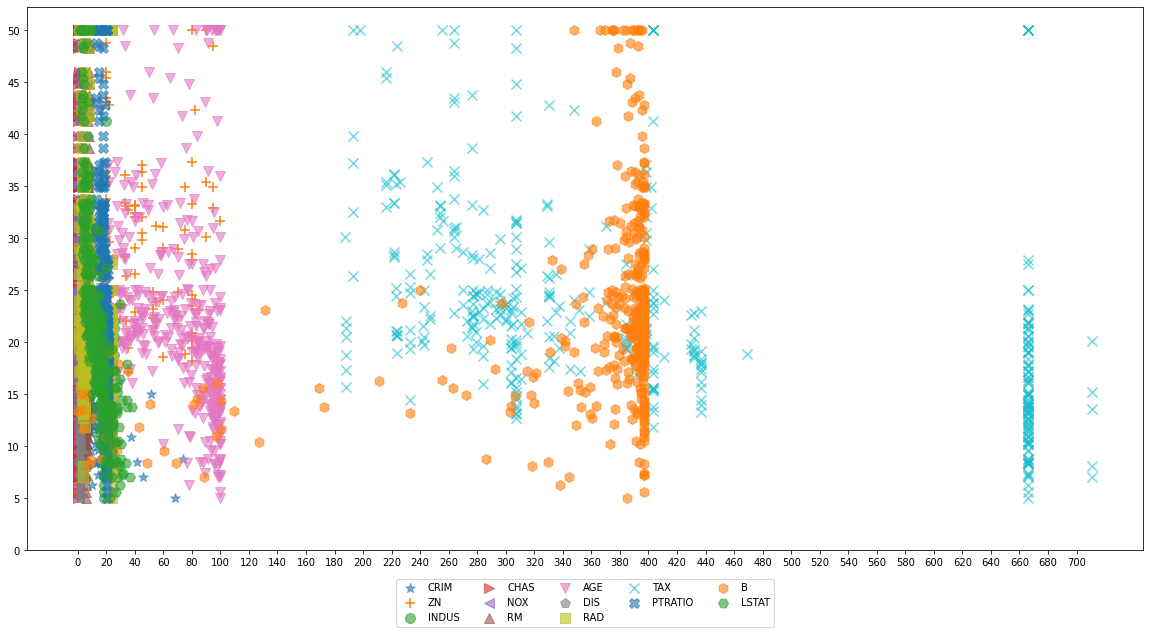

In [9]:
%matplotlib inline

display_graph(20, 10, 701, 20, 51, 5, 0.5,-0.15, 5, X_train, y_train)

## Let's try with Lasso Regression without StandardScaler first

In [10]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    lr = Lasso(alpha=alpha)
    lr.fit(X_train, y_train)
    train_score = lr.score(X_train, y_train)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = lr.score(X_test, y_test)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[lr] = [train_score, test_score]

Training accuracy with 0.001: 0.736015460407901
Testing accuracy with 0.001: 0.7444189650820822
Training accuracy with 0.003: 0.7359800666155767
Testing accuracy with 0.003: 0.7454393066673783
Training accuracy with 0.01: 0.7355774886803217
Testing accuracy with 0.01: 0.7484585824148912
Training accuracy with 0.03: 0.732038503778996
Testing accuracy with 0.03: 0.752353991514312
Training accuracy with 0.1: 0.719691357086484
Testing accuracy with 0.1: 0.7424532498042952
Training accuracy with 0.3: 0.7129494328707434
Testing accuracy with 0.3: 0.7245625289814297
Training accuracy with 1: 0.6777075109256954
Testing accuracy with 1: 0.640478318015629
Training accuracy with 3: 0.6047059885431587
Testing accuracy with 3: 0.48078542229662613


## Finding the model parameters with highest test accuracy

In [11]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.736015460407901 with Lasso(alpha=0.03)
Max test score: 0.752353991514312 with Lasso(alpha=0.03)


## Let's try this model with testing dataset

In [12]:
print (f"Accuracy with test dataset: {model.score(X_test, y_test)}")

Accuracy with test dataset: 0.752353991514312


## As you can see using L1 regularization is not helping and we are getting almost same results we got with Linear Regression this is because linear regression in this case was not overfitting. We got the maximum accuracy we could achieve with linear regression kind of algorithm on this dataset.

## Ridge Regression without StandardScaler

In [13]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    rd = Ridge(alpha=alpha)
    rd.fit(X_train, y_train)
    train_score = rd.score(X_train, y_train)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = rd.score(X_test, y_test)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[rd] = [train_score, test_score]

Training accuracy with 0.001: 0.7360198749372735
Testing accuracy with 0.001: 0.7439113948509976
Training accuracy with 0.003: 0.7360197881791299
Testing accuracy with 0.003: 0.7439686706089391
Training accuracy with 0.01: 0.736018813937194
Testing accuracy with 0.01: 0.7441662604486325
Training accuracy with 0.03: 0.7360105632365621
Testing accuracy with 0.03: 0.7447070358600252
Training accuracy with 0.1: 0.7359275818299236
Testing accuracy with 0.1: 0.7463532379554363
Training accuracy with 0.3: 0.7354025080280688
Testing accuracy with 0.3: 0.7495287112744755
Training accuracy with 1: 0.7328967021574186
Testing accuracy with 1: 0.7531604308735332
Training accuracy with 3: 0.7284216176833385
Testing accuracy with 3: 0.7528591308109992


## Finding the model parameters with highest test accuracy

In [14]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.7360198749372735 with Ridge(alpha=1)
Max test score: 0.7531604308735332 with Ridge(alpha=1)


## Let's try this model with testing dataset

In [15]:
print (f"Accuracy with test dataset: {model.score(X_test, y_test)}")

Accuracy with test dataset: 0.7531604308735332


## StandardScalar:
1. StandardScaler is applied column wide
2. The mathematical formula for StandardScalar is as: $ X_j^i = \frac {X_j^i - \mu_i}{\sigma_i} $
3. Where $i$ corresponds to column number, and $j$ to row number

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scalerX = scaler.fit(X_train_scaler.copy())
X_train_scaler = pd.DataFrame(scalerX.transform(X_train_scaler.copy()))
X_train_scaler.columns = dataset.feature_names
X_test_scaler = pd.DataFrame(scalerX.transform(X_test_scaler.copy()))
X_test_scaler.columns = dataset.feature_names

scalerY = scaler.fit(y_train_scaler.copy())
y_train_scaler = pd.DataFrame(scalerY.transform(y_train_scaler.copy()))
y_train_scaler.columns = ["MedHouseVal"]
y_test_scaler = pd.DataFrame(scalerY.transform(y_test_scaler.copy()))
y_test_scaler.columns = ["MedHouseVal"]

print ("X_train_scaler.shape:", X_train_scaler.shape)
print ("X_test_scaler.shape:", X_test_scaler.shape)
print ("y_train_scaler.shape:", y_train_scaler.shape)
print ("y_test_scaler.shape:", y_test_scaler.shape)
X_train_scaler.head()

X_train_scaler.shape: (404, 13)
X_test_scaler.shape: (102, 13)
y_train_scaler.shape: (404, 1)
y_test_scaler.shape: (102, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.425574,0.011703,-0.473932,-0.283221,-0.250618,-0.167332,0.975932,0.991197,-0.536525,-0.598750,-1.480056,0.449696,0.896413
1,-0.376881,0.331168,-1.030702,-0.283221,0.191157,1.650555,-0.526160,-0.435850,-0.536525,-0.876716,-2.494769,0.379174,-1.288586
2,-0.438292,0.544145,-0.903644,-0.283221,-1.099518,0.609962,-1.185699,0.736336,-0.651332,-0.776175,0.272630,0.449696,-0.997526
3,-0.304285,-0.520738,-0.435387,-0.283221,-0.129346,-0.810175,0.906871,0.195046,-0.651332,-0.622407,1.195096,0.057230,1.367848
4,0.382782,-0.520738,0.986516,-0.283221,1.386548,0.640774,0.855075,-0.690062,1.644813,1.500777,0.826110,-3.787831,0.662745


In [18]:
y_train_scaler.head()

,MedHouseVal
0,0.459119
1,2.195484
2,0.554407
3,-1.065494
4,-0.991381


### Now Let's see the graph again

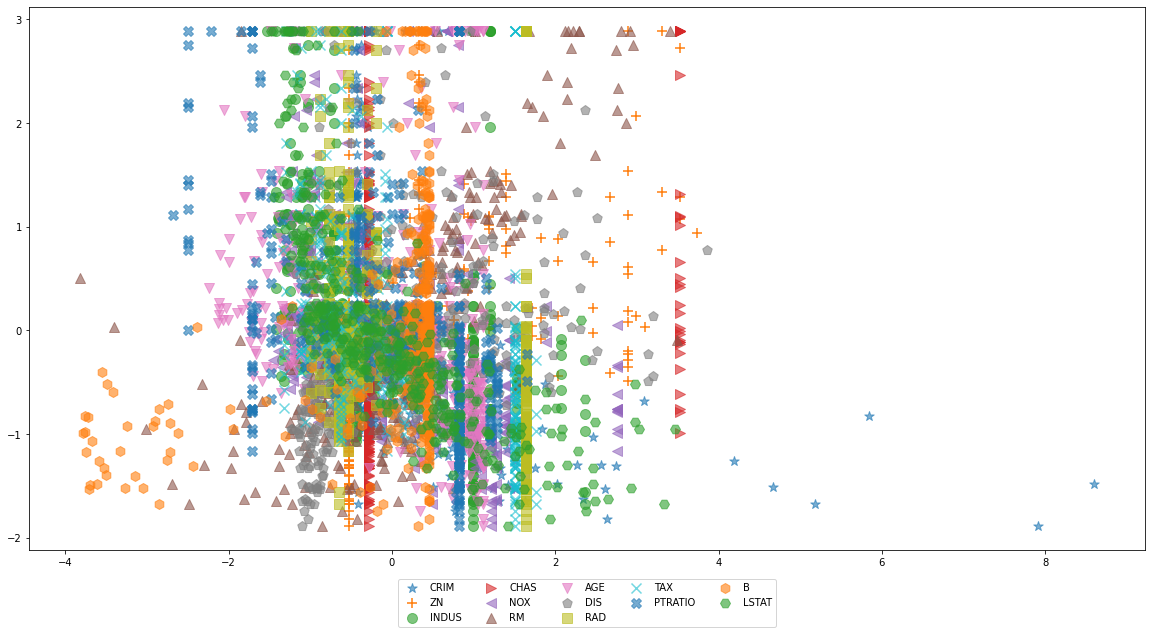

In [19]:
display_graph(20, 10, 0, 0, 0, 0, 0.5,-0.15, 5, X_train_scaler, y_train_scaler)

## Now let's try to run Lasso Regression once again with scaled X_train_scaler and y_train_scaler

In [20]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    lr = Lasso(alpha=alpha, normalize=True)
    lr.fit(X_train_scaler, y_train_scaler)
    train_score = lr.score(X_train_scaler, y_train_scaler)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = lr.score(X_train_scaler, y_train_scaler)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[lr] = [train_score, test_score]

Training accuracy with 0.001: 0.7201621545475836
Testing accuracy with 0.001: 0.7201621545475836
Training accuracy with 0.003: 0.6878932371336752
Testing accuracy with 0.003: 0.6878932371336752
Training accuracy with 0.01: 0.6149631615369179
Testing accuracy with 0.01: 0.6149631615369179
Training accuracy with 0.03: 0.19936484026888657
Testing accuracy with 0.03: 0.19936484026888657
Training accuracy with 0.1: 0.0
Testing accuracy with 0.1: 0.0
Training accuracy with 0.3: 0.0
Testing accuracy with 0.3: 0.0
Training accuracy with 1: 0.0
Testing accuracy with 1: 0.0
Training accuracy with 3: 0.0
Testing accuracy with 3: 0.0


## Finding the model parameters with highest test accuracy

In [21]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.7201621545475836 with Lasso(alpha=0.001, normalize=True)
Max test score: 0.7201621545475836 with Lasso(alpha=0.001, normalize=True)


## Let's try this model with testing dataset

In [22]:
print (f"Accuracy with test dataset: {model.score(X_test_scaler, y_test_scaler)}")

Accuracy with test dataset: 0.7079355387656692


## Now let's try to run Ridge Regression once again with scaled X_train_scaler and y_train_scaler

In [23]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    rd = Ridge(alpha=alpha, normalize=True)
    rd.fit(X_train_scaler, y_train_scaler)
    train_score = rd.score(X_train_scaler, y_train_scaler)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = rd.score(X_train_scaler, y_train_scaler)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[rd] = [train_score, test_score]

Training accuracy with 0.001: 0.7360170578412653
Testing accuracy with 0.001: 0.7360170578412653
Training accuracy with 0.003: 0.7359954796756425
Testing accuracy with 0.003: 0.7359954796756425
Training accuracy with 0.01: 0.7357831782917026
Testing accuracy with 0.01: 0.7357831782917026
Training accuracy with 0.03: 0.734469311131881
Testing accuracy with 0.03: 0.734469311131881
Training accuracy with 0.1: 0.7274199136392705
Testing accuracy with 0.1: 0.7274199136392705
Training accuracy with 0.3: 0.7051596898151092
Testing accuracy with 0.3: 0.7051596898151092
Training accuracy with 1: 0.6333903219535527
Testing accuracy with 1: 0.6333903219535527
Training accuracy with 3: 0.4983567486924505
Testing accuracy with 3: 0.4983567486924505


## Finding the model parameters with highest test accuracy

In [24]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.7360170578412653 with Ridge(alpha=0.001, normalize=True)
Max test score: 0.7360170578412653 with Ridge(alpha=0.001, normalize=True)


## Let's try this model with testing dataset

In [25]:
print (f"Accuracy with test dataset: {model.score(X_train_scaler, y_train_scaler)}")

Accuracy with test dataset: 0.7360170578412653


## Lasso Regression with normalize set to True

In [26]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    lr = Lasso(alpha=alpha, normalize=True)
    lr.fit(X_train_norm, y_train_norm)
    train_score = lr.score(X_train_norm, y_train_norm)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = lr.score(X_test_norm, y_test_norm)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[lr] = [train_score, test_score]

Training accuracy with 0.001: 0.7356826961325297
Testing accuracy with 0.001: 0.7435102139150755
Training accuracy with 0.003: 0.7336848851233109
Testing accuracy with 0.003: 0.7392355905782252
Training accuracy with 0.01: 0.7194011089309911
Testing accuracy with 0.01: 0.706486491010172
Training accuracy with 0.03: 0.6856211558035135
Testing accuracy with 0.03: 0.6686883096749112
Training accuracy with 0.1: 0.6073505805982131
Testing accuracy with 0.1: 0.5783691441692144
Training accuracy with 0.3: 0.15284016614775853
Testing accuracy with 0.3: 0.12148656821315573
Training accuracy with 1: 0.0
Testing accuracy with 1: -0.020355329213277873
Training accuracy with 3: 0.0
Testing accuracy with 3: -0.020355329213277873


## Finding the model parameters with highest test accuracy

In [27]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.7356826961325297 with Lasso(alpha=0.001, normalize=True)
Max test score: 0.7435102139150755 with Lasso(alpha=0.001, normalize=True)


## Let's try this model with testing dataset

In [28]:
print (f"Accuracy with test dataset: {model.score(X_test_norm, y_test_norm)}")

Accuracy with test dataset: 0.7435102139150755


## As you can see using L1 regularization is not helping and we are getting almost same results we got with Linear Regression this is because linear regression in this case was not overfitting. We got the maximum accuracy we could achieve with linear regression kind of algorithm on this dataset.

## Ridge Regression with normalize set to True

In [29]:
alpha_ones = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
scores = {}
for alpha in alpha_ones:
    rd = Ridge(alpha=alpha, normalize=True)
    rd.fit(X_train_norm, y_train_norm)
    train_score = rd.score(X_train_norm, y_train_norm)
    print (f"Training accuracy with {alpha}: {train_score}")
    test_score = rd.score(X_test_norm, y_test_norm)
    print (f"Testing accuracy with {alpha}: {test_score}")
    scores[rd] = [train_score, test_score]

Training accuracy with 0.001: 0.7360170578412653
Testing accuracy with 0.001: 0.743892442509009
Training accuracy with 0.003: 0.7359954796756425
Testing accuracy with 0.003: 0.7438969896207417
Training accuracy with 0.01: 0.7357831782917026
Testing accuracy with 0.01: 0.7437819474728111
Training accuracy with 0.03: 0.7344693111318809
Testing accuracy with 0.03: 0.7427533517903953
Training accuracy with 0.1: 0.7274199136392703
Testing accuracy with 0.1: 0.7363616132260756
Training accuracy with 0.3: 0.7051596898151091
Testing accuracy with 0.3: 0.7138090503985739
Training accuracy with 1: 0.6333903219535527
Testing accuracy with 1: 0.6378489009905952
Training accuracy with 3: 0.4983567486924504
Testing accuracy with 3: 0.49926344194574734


## Finding the model parameters with highest test accuracy

In [30]:
train_scores, test_scores, model = highest_accuracy(scores)
print (f"Max train score: {train_scores} with {model}")
print (f"Max test score: {test_scores} with {model}")

Max train score: 0.7360170578412653 with Ridge(alpha=0.003, normalize=True)
Max test score: 0.7438969896207417 with Ridge(alpha=0.003, normalize=True)


## Let's try this model with testing dataset

In [31]:
print (f"Accuracy with test dataset: {model.score(X_test_norm, y_test_norm)}")

Accuracy with test dataset: 0.7438969896207417
